In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# silence unessary warnings!
%matplotlib inline

In [3]:
df_train = pd.read_csv('data/train.csv')

In [17]:
df_train

,Train_ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,60,RL,88.0,12128,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,11,2006,WD,Abnorml,209000
1,2,120,RL,48.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,254000
2,3,50,RL,120.0,17360,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,172500
3,4,20,RL,73.0,8688,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,232000
4,5,80,RL,88.0,15312,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,COD,Normal,148000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1566,60,RL,107.0,13641,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,492000
1566,1567,20,RL,90.0,11664,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,250000
1567,1568,80,RL,88.0,15400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,165000
1568,1569,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,143000


In [22]:
# iterating the columns 
for col in df_train.columns: 
    print(col) 


Train_ID
MS SubClass
MS Zoning
Lot Frontage
Lot Area
Street
Alley
Lot Shape
Land Contour
Utilities
Lot Config
Land Slope
Neighborhood
Condition 1
Condition 2
Bldg Type
House Style
Overall Qual
Overall Cond
Year Built
Year Remod/Add
Roof Style
Roof Matl
Exterior 1st
Exterior 2nd
Mas Vnr Type
Mas Vnr Area
Exter Qual
Exter Cond
Foundation
Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin SF 1
BsmtFin Type 2
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
Heating
Heating QC
Central Air
Electrical
1st Flr SF
2nd Flr SF
Low Qual Fin SF
Gr Liv Area
Bsmt Full Bath
Bsmt Half Bath
Full Bath
Half Bath
Bedroom AbvGr
Kitchen AbvGr
Kitchen Qual
TotRms AbvGrd
Functional
Fireplaces
Fireplace Qu
Garage Type
Garage Yr Blt
Garage Finish
Garage Cars
Garage Area
Garage Qual
Garage Cond
Paved Drive
Wood Deck SF
Open Porch SF
Enclosed Porch
3Ssn Porch
Screen Porch
Pool Area
Pool QC
Fence
Misc Feature
Misc Val
Mo Sold
Yr Sold
Sale Type
Sale Condition
SalePrice


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Train_ID         1570 non-null   int64  
 1   MS SubClass      1570 non-null   int64  
 2   MS Zoning        1570 non-null   object 
 3   Lot Frontage     1306 non-null   float64
 4   Lot Area         1570 non-null   int64  
 5   Street           1570 non-null   object 
 6   Alley            98 non-null     object 
 7   Lot Shape        1570 non-null   object 
 8   Land Contour     1570 non-null   object 
 9   Utilities        1570 non-null   object 
 10  Lot Config       1570 non-null   object 
 11  Land Slope       1570 non-null   object 
 12  Neighborhood     1570 non-null   object 
 13  Condition 1      1570 non-null   object 
 14  Condition 2      1570 non-null   object 
 15  Bldg Type        1570 non-null   object 
 16  House Style      1570 non-null   object 
 17  Overall Qual  

In [24]:
df_train["SalePrice"].describe()

count      1570.000000
mean     183176.052229
std       81524.931669
min       13100.000000
25%      131000.000000
50%      162500.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

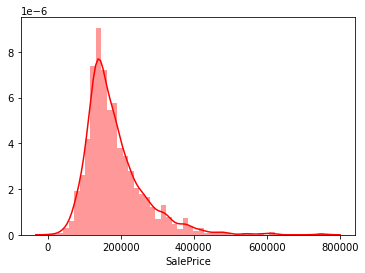

In [27]:
sns.distplot(df_train["SalePrice"],color='r')

<AxesSubplot:>

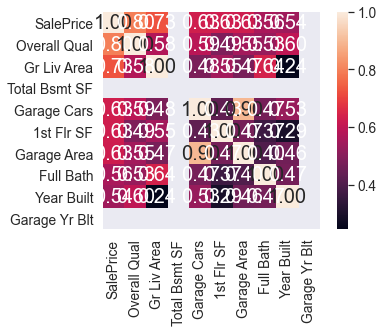

In [42]:
i = 10 
cols = df_train.corr().nlargest(i, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True,
           fmt='.2f', annot_kws={'size': 20},
         xticklabels=cols.values, yticklabels=cols.values )